# NNIA 18/19 Project 4:  Optimization \& Recurrent Neural Networks

## Deadline: 28. Februrary 2019, 23:59

In [1]:
# imports
%matplotlib notebook
import re
import math
import random
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn
from mpl_toolkits.mplot3d import Axes3D
from random import randint
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

## 1. Optimization Algorithms$~$ (6 points)

In this task, we will get familiar with various optimization methods such as **Vanilla Gradient Descent** (GD), [**Gradient Descent with Momentum**](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer), [**RMSProp**](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) and [**AdaGrad**](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer) by implementing them in TensorFlow and *visualizing* the path (convergence) towards minima using [Matplotlib 3D/Contour plots](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

**3D Loss Surface**

For the following exercises we assume that the surface of the general **loss** we want to minimize is given by a function `z`. On this function, we apply different optimization methods and want to visualize their stepwise improvements. `z` is defined as:

$$ term1 = \frac{2}{\sqrt{(2\pi \alpha_{1}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_1)^2}{(\frac{\alpha {1}}{2})^2} + \frac{(y-\mu_1)^2}{(\alpha_1)^2}     \right] \right)} $$

$$ term2 = \frac{1}{\sqrt{(2\pi \alpha_{2}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_2)^2 + (y-\mu_2)^2}{(\alpha_2)^2} \right] \right)} $$

$$ term3 = \frac{1}{20} * \left(x^2  + xy + y^2 \right) $$ <br>

$$ z_{\alpha, \mu}(x, y) = term1 - term2 + term3 $$

To make yourself comfortable working with this function we provide a visualization by plotting it in 3D using [matplotlib-3D-wireframe](https://matplotlib.org/devdocs/gallery/mplot3d/wire3d.html). You can interactivaley play around with the plot to get familiar with the surface.

<IPython.core.display.Javascript object>


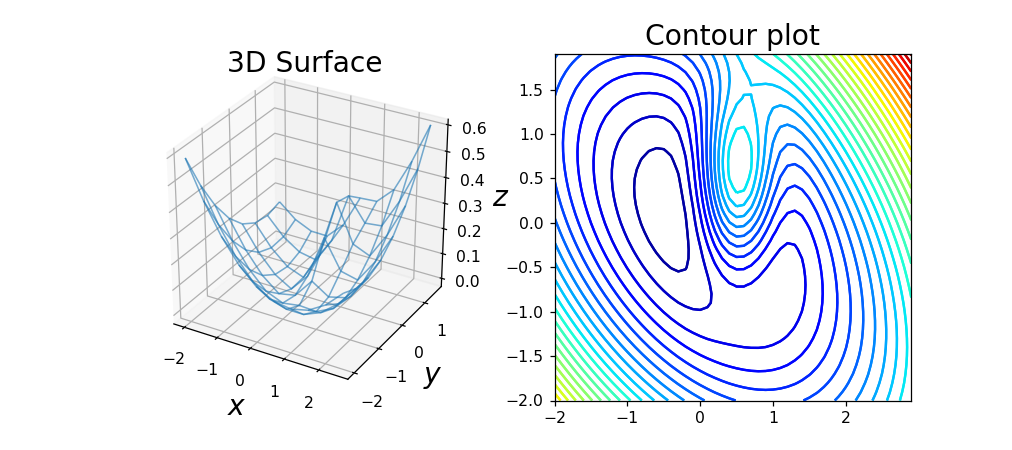

In [87]:
# %matplotlib inline

# params of our error surface `z`
alpha_1 = 1.0
alpha_2 = 2.0
mu_1 = 0.5
mu_2 = 0.0
range_x, range_y = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

def func_z(X, Y):
    """
    function definition of our 3D error surface
    """
    exp_input_1 = -1 * ((((X - mu_1)**2) / (alpha_1/2)**2) + (((Y - mu_1)**2)/(alpha_1**2)))
    term_1 = 2/np.sqrt((2 * np.pi * alpha_1**2)**2) * np.exp(exp_input_1)
    
    exp_input_2 = -1 * ( ((X - mu_2)**2 + (Y - mu_2)**2) / alpha_2**2)
    term_2 = 1/np.sqrt((2 * np.pi * alpha_2**2)**2) * np.exp(exp_input_2)
    
    term_3 = 1/20 * (X**2 + X * Y + Y**2)
    
    return term_1 - term_2 + term_3

# x,y values for `Wireframe` plot
x_wireframe, y_wireframe = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

# x,y values for `Contour` plot
x_contour, y_contour = np.arange(-2.0, 3.0, 0.1), np.arange(-2.0, 2.0, 0.1)

# Following code implements the plotting the Error Surface
X_sparse, Y_sparse = np.meshgrid(x_wireframe, y_wireframe)
Z_sparse = func_z(X_sparse, Y_sparse)

X_dense, Y_dense = np.meshgrid(x_contour, y_contour)
Z_dense = func_z(X_dense, Y_dense)

fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_wireframe(X_sparse, Y_sparse, Z_sparse, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)

ax1.set_xlabel(r'$x$',fontsize=18)
ax1.set_ylabel(r'$y$',fontsize=18)
ax1.set_zlabel(r'$z$',fontsize=18)
ax1.set_title('3D Surface', fontsize=18)

ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)
ax2.autoscale(False)
ax2.set_title('Contour plot', fontsize=18)

plt.show()

### 1.1 Error Implementation with Tensorflow

Usually, we minimize the loss function of a neural network which is defined by a tensorflow computational graph which allows us perform optimization easily. Here, we first need to implement the 3D surface of the loss function described above using tensorflow. 

Setup the graph of the function by implementing `problem_3d` using tensorflow operations and variables. Write your code as specified by `# TODO`. (**1 point**)

In [88]:
# The following variables  will come in handy when implementing the error surface using tensorflow functions below
tf_x, tf_y, tf_z, = None, None, None
tf_reinit_x, tf_reinit_y = None, None
session = None

def problem_3d(start_x, start_y):
    global session
    global tf_x, tf_y, tf_z
    global tf_reinit_x, tf_reinit_y
    
    tf.reset_default_graph()
    session = tf.InteractiveSession()

    with tf.variable_scope('opt'):
        tf_x = tf.get_variable('x', initializer=tf.constant(start_x, shape=None, dtype=tf.float32))
        tf_y = tf.get_variable('y', initializer=tf.constant(start_y, shape=None, dtype=tf.float32))

    with tf.variable_scope('opt', reuse=True):
        tf_reinit_x = tf.assign(tf.get_variable('x'), start_x)
        tf_reinit_y = tf.assign(tf.get_variable('y'), start_y)
    
    # TODO Implement 3D error surface using the above defined variables
    #tf_z = func_z(tf_x, tf_y)
    tf_input_1 = -1 * ((((tf_x - mu_1)**2) / (alpha_1/2)**2) + (((tf_y - mu_1)**2)/(alpha_1**2)))
    tf_term_1 = 2/tf.sqrt((2 * math.pi * alpha_1**2)**2) * tf.math.exp(tf_input_1)
    
    tf_input_2 = -1 * ( ((tf_x - mu_2)**2 + (tf_y - mu_2)**2) / alpha_2**2)
    tf_term_2 = 1/tf.sqrt((2 * math.pi * alpha_2**2)**2) * tf.math.exp(tf_input_2)
    
    tf_term_3 = 1/20 * (tf_x**2 + tf_x * tf_y + tf_y**2)
    
    tf_z = tf_term_1 - tf_term_2 + tf_term_3 

---
**Points:** $0.0$ of $1$
**Comments:** None

---

### 1.2 Implementation of Gradient Descent with Momentum

In the lecture chapter 8 on slide 20 you got introduced to an advanced implementation of the Gradient Descent Optimizer, called Gradient Descent with Momentum. In this exercise you should implement Gradient Descent with Momentum using tensorflow operations. 

In the following, we provide a class for GD with Momentum where you have to fill in the `#TODO` sections only. To get gradients of the objective you want to minimize, use the function [`tf.gradients`](https://www.tensorflow.org/api_docs/python/tf/gradients). Make sure, that your variables are always shaped correctly! (**2 points**).

In [99]:
class GradientDescentMomentumOptimizer():
    
    def __init__(self, learning_rate, alpha):

        with tf.variable_scope('gdm_opt'):
            self.learning_rate = tf.get_variable('lr', initializer=tf.constant(learning_rate, shape=[], dtype=tf.float32))
            self.alpha = tf.get_variable('alpha', initializer=tf.constant(alpha, shape=None, dtype=tf.float32))
            self.v = tf.get_variable('v', initializer=tf.constant([0, 0], shape=[2, 1], dtype=tf.float32))

        # input 
        self.input_x = tf.placeholder("float", [])
        self.input_y = tf.placeholder("float", [])

        # optimized outputs
        self.out_x = None
        self.out_y = None  

        # gradients
        self.grads = None

        # objective to minimize      
        self.objective = None
        
    def minimize(self, objective):
        self.objective = objective
        return self.optimization_step()

    def update(self, new_x, new_y, new_v):

        with tf.variable_scope('opt', reuse=True):
            tf_reinit_x = tf.assign(tf.get_variable('x'), new_x[0])
            tf_reinit_y = tf.assign(tf.get_variable('y'), new_y[0])

        with tf.variable_scope('gdm_opt', reuse=True):
            set_v =  tf.assign(tf.get_variable('v'), new_v)
            
        return tf_reinit_x, tf_reinit_y, set_v

    def optimization_step(self):
        
        global tf_x, tf_y   
        
        # TODO: Implement this function returning the updated positions into self.out_x, self.out_y
        
        # Momentum
        #
        # v_t = alpha*v_t-1 + lr*gradient
        # para = para - v_t
        #
        # terminate v: v_t s.t. stepsize = lr*gradient/(1-alpha)
        
        self.grads = tf.gradients(
        ys=tf_z,
        xs=[tf_x, tf_y])

        #print(type(self.grads))   #<class 'list'>
        #print(len(self.grads)) #1
        #print(type(self.v))   #<class 'tensorflow.python.ops.variables.Variable'>
        
        
        v = self.v
        v = self.alpha * v + self.learning_rate * self.grads
        self.out_x = tf_x + v[0]
        self.out_y = tf_y + v[1]
        
        return self.out_x, self.out_y

In the following, use your implementation to find a local minimum in our loss function. We choose a fixed starting position and run the optimizer for a certain amount of steps.

In [100]:
# starting position
start_x, start_y = 0.55, 0.6
n_steps = 60

problem_3d(start_x,start_y)

lr = 0.2
alpha = 0.9

optimizer = GradientDescentMomentumOptimizer(lr, alpha)
opt_step = optimizer.minimize(objective=tf_z)

# initialize variables
session.run(tf.global_variables_initializer())

# set initial values
session.run([tf_reinit_x, tf_reinit_y])

# keep track of all steps
opt_gd_points_x, opt_gd_points_y, opt_gd_points_z = [],[],[]

# fill in the initial position
opt_gd_points_x.append(start_x)
opt_gd_points_y.append(start_y)
opt_gd_points_z.append(func_z(start_x,start_y))

x, y = [start_x], [start_y]

print('Momentum GD Optimization started')
for step in range(n_steps):

    # perform optimization step
    x, y, z, v, cur_gradient, _ = session.run([optimizer.out_x, optimizer.out_y, tf_z, optimizer.v, optimizer.grads, opt_step], feed_dict={optimizer.input_x: x[0], optimizer.input_y: y[0]}) 

    # update the function
    session.run([optimizer.update(x, y, v)])
    
    opt_gd_points_x.append(x[0])
    opt_gd_points_y.append(y[0])
    opt_gd_points_z.append(func_z(x[0], y[0]))
    
    if step % 10 == 0:
        print("Optimization step {} - minimized value: {}".format(step, z))

Momentum GD Optimization started
Optimization step 0 - minimized value: 0.3279164135456085
Optimization step 10 - minimized value: 0.32761332392692566
Optimization step 20 - minimized value: 0.32761216163635254
Optimization step 30 - minimized value: 0.32761216163635254
Optimization step 40 - minimized value: 0.32761216163635254
Optimization step 50 - minimized value: 0.32761216163635254


<IPython.core.display.Javascript object>


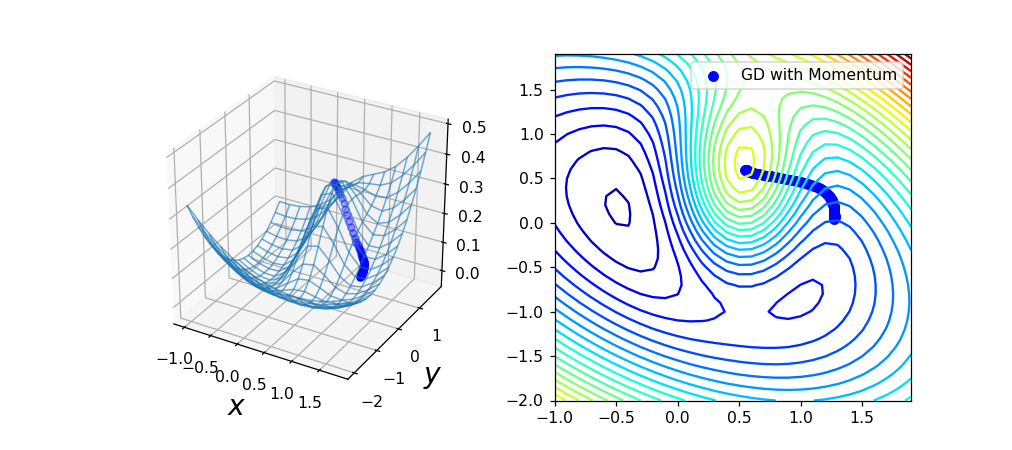

In [96]:
range_x,range_y = np.arange(-1.0,2.0,0.2), np.arange(-2.0,2.0,0.2)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = func_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-1.0,2.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = func_z(X_hires,Y_hires)

fig = plt.figure(figsize=(9,4))

epsilon = 0.0
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# plot
ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  cmap=cm.jet)
ax2.autoscale(False)

for idx, (x,y,z) in enumerate(zip(opt_gd_points_x, opt_gd_points_y, opt_gd_points_z)):
    if idx != len(opt_gd_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(np.asarray(x),np.asarray(y) , color='blue')
    else:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), label='GD with Momentum', zorder=100)
        ax2.scatter(x,y, color='blue', label='GD with Momentum')

ax1.set_xlabel(r'$x$', fontsize=18)
ax1.set_ylabel(r'$y$', fontsize=18)
plt.legend()
plt.show()

Try out different combinations for the momentum scaler `alpha` and the learning rate `lr`. What are the impacts of these parameters? Does Momentum bring any benefit in this special example compared to GD without Momentum? - Briefly explain! (**1 point**).


__Answer__: The larger `alpha` is relative to `lr`, the more previous gradients aﬀect the current direction. Also, the bigger `lr` and the closer `alpha` to 1, the bigger the stepsize.
SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another , which are common around local optima. Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way until it reaches its terminal velocity. The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

---
**Points:** $0.0$ of $3$
**Comments:** None

---

### 1.3 Using Tensorflow's Optimizer Implementations

Tensorflow does of course provide optimizers which you do not have to implement explictly. In order to compare these different optimizers, complete the code below. Use the following implementations from the tensorflow library:

- [Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
- [Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer)
- [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) 
- [AdaGrad](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer)

(**0.5 points**)


In [81]:
# starting position
start_x, start_y = 0.55, 0.6
n_steps = 60

# Write code to define GD, Momentum, RMSProp and Adagrad implementations on tf_z global variable defined by problem_3d

with tf.variable_scope('gd', reuse=tf.AUTO_REUSE):
    # TODO: Define Gradient Descent Optimizer with learning rate = 0.1
    tf_optimize_z = tf.train.GradientDescentOptimizer(0.1).minimize(tf_z)

with tf.variable_scope('momentum', reuse=tf.AUTO_REUSE):
    # TODO: Define Gradient Descent with Nestrov's Momentum Optimizer with learning rate = 0.1 and momentum = 0.9
    tf_mom_optimize_z = tf.train.MomentumOptimizer(learning_rate = 0.1, momentum = 0.9, use_nesterov=True).minimize(tf_z)
    
with tf.variable_scope('rmsprop', reuse=tf.AUTO_REUSE):
    # TODO: Define RMSProp with learning rate = 0.1
    tf_rms_optimize_z = tf.train.RMSPropOptimizer(learning_rate = 0.1).minimize(tf_z)
    
with tf.variable_scope('adagrad', reuse=tf.AUTO_REUSE):
    # TODO: Define Adagrad Optimizer with learning rate = 0.1
    tf_ada_optimize_z = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(tf_z)
    

Vanilla GD Optimization started
Vanilla GD Optimization finished
Momentum Optimization started
Momentum Optimization finished
RMSProp Optimization started
RMSProp Optimization finished
Adagrad Optimization started
Adagrad Optimization finished


<IPython.core.display.Javascript object>


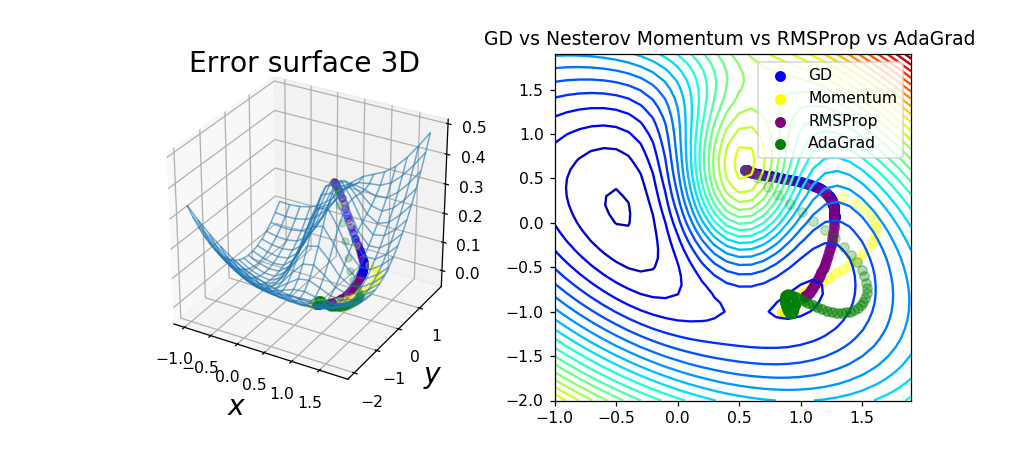

In [82]:
session.run(tf.global_variables_initializer())

# Run vanilla GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_gd_points_x, opt_gd_points_y, opt_gd_points_z = [],[],[]
opt_gd_points_x.append(start_x)
opt_gd_points_y.append(start_y)
opt_gd_points_z.append(func_z(start_x,start_y))

print('Vanilla GD Optimization started')
for step in range(n_steps):
    session.run(tf_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_gd_points_x.append(x)
    opt_gd_points_y.append(y)
    opt_gd_points_z.append(z)
print('Vanilla GD Optimization finished')


# Run Nestrov's Momentum GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(func_z(start_x,start_y))


print("Momentum Optimization started")
for step in range(n_steps):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
print('Momentum Optimization finished')
    
# RMSProp
session.run([tf_reinit_x, tf_reinit_y])

opt_rms_points_x, opt_rms_points_y, opt_rms_points_z = [],[],[]
opt_rms_points_x.append(start_x)
opt_rms_points_y.append(start_y)
opt_rms_points_z.append(func_z(start_x,start_y))

print('RMSProp Optimization started')
for step in range(n_steps):
    session.run(tf_rms_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_rms_points_x.append(x)
    opt_rms_points_y.append(y)
    opt_rms_points_z.append(z)
print('RMSProp Optimization finished')


# Run AdaGrad on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(func_z(start_x,start_y))


print('Adagrad Optimization started')
for step in range(n_steps):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)
print('Adagrad Optimization finished')

    
range_x,range_y = np.arange(-1.0,2.0,0.2), np.arange(-2.0,2.0,0.2)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = func_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-1.0,2.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = func_z(X_hires,Y_hires)

# Subplots visualizing the minimization steps

fig = plt.figure(figsize=(9,4))

epsilon = 0.0
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# plot
ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  cmap=cm.jet)
ax2.autoscale(False)

# vanilla GD
for idx, (x,y,z) in enumerate(zip(opt_gd_points_x, opt_gd_points_y, opt_gd_points_z)):
    if idx != len(opt_gd_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(np.asarray(x),np.asarray(y) , color='blue')
    else:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), label='GD', zorder=100)
        ax2.scatter(x,y, color='blue', label='GD')

# GD with momentum
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if idx != len(opt_mom_points_x)-1:
        ax1.scatter(x,y , z + epsilon , color='yellow', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='yellow', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum', zorder=100)
        ax2.scatter(x,y, color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum')

# RMSProp
for idx, (x,y,z) in enumerate(zip(opt_rms_points_x, opt_rms_points_y, opt_rms_points_z)):
    if idx != len(opt_rms_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='purple', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp', zorder=100)
        ax2.scatter(x,y, color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp')
        
# AdaGrad
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
    else:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)
        ax2.scatter(x,y,color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)

ax1.set_xlabel(r'$x$', fontsize=18)
ax1.set_ylabel(r'$y$', fontsize=18)
ax1.set_title("Error surface 3D", fontsize=18)
ax2.set_title('GD vs Nesterov Momentum vs RMSProp vs AdaGrad ', fontsize=12)
plt.legend()
plt.show()

Evaluate the function `z` at the termination points for each algorithm from the plots above. Which algorithm has made better progress in minimizing `z`?. Is it generally good to  always use this method? Briefly explain your findings. (**1.5 points**)

In [83]:
print('termination points:')
print('GD:', opt_gd_points_z[-1])
print('Momentum:', opt_mom_points_z[-1])
print('RMSProp:', opt_rms_points_z[-1])
print('Adagrad:', opt_ada_points_z[-1])

termination points:
GD: 0.08112463
Momentum: 0.03704855
RMSProp: 0.03668476
Adagrad: 0.036884874


__Answer__: According to the termination point results, RMSProp and Adagrad produced the best results in minimizing z. RMSProp and Adagrad are method using adaptive learning rate on the optimization process. 

In the context of convex optimization, the AdaGrad algorithm enjoys some desirable theoretical properties. Empirically, however, for training deep neuralnetwork models, AdaGrad performs well for some but not all deep learning models. The accumulation of squared gradients from the beginning oftraining can result in a premature and excessive decrease in the eﬀective learningrate.

On the other hand, the RMSProp algorithm modiﬁes AdaGrad to perform better inthe nonconvex setting by changing the gradient accumulation into an exponentiallyweighted moving average. RMSProp usesan exponentially decaying average to discard history from the extreme past so thatit can converge rapidly after ﬁnding a convex bowl, as if it were an instance of theAdaGrad algorithm initialized within that bowl.

Overall, RMSProp is preferable over AdaGrad in nonconvex setting with SGD. 

---
**Points:** $0.0$ of $2$
**Comments:** None

---

## 2. RNN Implementation in Tensorflow$~$ (14 points)

In the following exercise you should implement a simple Recurrent Neural Network using tensorflow. The task we consider here is learning a certain repeating pattern of digits.

Consider the following infinite sequence: 

$$1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, ..., 9, 1, 2, 2, 3, ...$$

A digit $i \in [1, 9]$ appears i times subsequently followed by $i+1$. After $i$ equals to 9, the sequence continues with $i = 1$. 

While the recognition of this pattern is easy for humans, in this exercise, we want to train a recurrent neural network such that it is able to predict the next digit for a given sequence.

### 2.1. Prepraring the data

First, we have to generate our training and test data. The function `generate_dataset` should return a certain amount of valid sequence snippets from the pattern described above with a given sample_size.

Valid sequcences of size 5 are for example:
- $[1, 2, 2, 3, 3]$ - expected prediction: 3
- $[9, 9, 1, 2, 2]$ - expected prediction: 3
- $[7, 7, 7, 7, 7]$ - expected prediction: 7 or 8

not valid sequcences of size 5 are for example:
- $[1, 1, 2, 2, 3]$
- $[3, 4, 4, 5, 5]$
- $[9, 0, 1, 2, 2]$

Complete the function implementations below. (**1.5 points**)



In [2]:
def get_seq_samples(start=1, length=100):

    res_sequence = []
    
    # TODO: Implement this function returning one sequence starting with the digit 'start' containing 'length' items
    count = 0
    curr_elm = start
    flag = False
    
    while not flag:
        i = 0
        for i in range(curr_elm):
            res_sequence.append(curr_elm)                        
            count+=1
            if(count >= length):
                if(i < curr_elm - 1):
                    next_elm = curr_elm
                else:
                    next_elm = (curr_elm + 1) % 9
                flag = True
                break                
        curr_elm = (curr_elm + 1) % 9
        
    return res_sequence, next_elm

def generate_dataset(sample_count, sample_size):

    dataset = []
    labels = []    

    # TODO: Implement this function returning an array containing 'sample_count' generated samples of length 'sample_size'
    # and an array containing the corresponing digits which should get predicted
    for i in range(sample_count):
        #start is random number between 1 and 9        
        start = randint(0, 9)
        seq, label = get_seq_samples(start, sample_size)  
        dataset.append(seq)
        labels.append(label)
    return np.array(dataset), np.array(labels)   



---
**Points:** $0.0$ of $1.5$
**Comments:** None

---

### 2.2. Model Setup

In the next step we implement a recurrent many-to-one neural network which processes batches of input sequences to one single output value. 

An RNN-cell implements the following function:

$$a^{(t)} = W\cdot h^{(t-1)} + U\cdot x^{(t)} + b$$ 
$$h^{(t)} = tanh(a^{(t)})$$
$$...$$
$$o = V\cdot h^{(n)} + c$$

$t$ indicates the time step iteration, $b$ and $c$ are bias values and $U, V $ and $W$ weight parameters. $o$ is the resulting output which gets computed after processing a sequence of $n$ numbers.

a) To get familiar with the model design, draw an unfolded model graph for input sequences of length 3 (check the images in the [**Deep Learning Book - Chapter 10.2**](https://www.deeplearningbook.org/contents/rnn.html) ). For each cell, state its variable name. Also include where which mathematical operation ($+, \cdot, tanh()$) should be applied. (**2 points**)


b) Assume you have implemented the model from a) in tensorflow. For each cell in your image, add the tensor shapes (array dimensions) when the `batch_size` is set to 4 sequences. Assume that the inputs are sequences of digits, the outputs are one-hot encoded and the RNN layer size is 50. (**2 points**)

<img src="rnn.jpg">


c) Finally, your task is to complete the following code at the `# TODO` sections, so that the neural network is able to process batches of size `batch_size` of digit sequences of the length `input_seq_len`. The hidden RNN size is given by `n_hidden`. (**5 points**)

In [3]:
tf.reset_default_graph()

# parameters
learning_rate = 0.01
epochs = 70
batch_size = 5
num_of_classes = 9

# length of a single sequence
input_seq_len = 10

# number of units in RNN cell
n_hidden = 90


RNN_graph = tf.Graph()
with RNN_graph.as_default():

    # tf Graph input: X = sequences, Y = digits to predict 
    batchX_placeholder = tf.placeholder(tf.float32, [batch_size, input_seq_len])
    batchY_placeholder = tf.placeholder(tf.int32, [batch_size, 1])

    # init_state = h0
    init_state = tf.Variable(tf.random_normal([batch_size, n_hidden]))

    # TODO: RNN output node weights and biases - set the tf.Variables with correct shapes and random_normal initialization
    weights = {
        'U': tf.Variable(tf.random_normal([1, n_hidden])),
        'W': tf.Variable(tf.random_normal([n_hidden, n_hidden])),
        'V': tf.Variable(tf.random_normal([n_hidden, num_of_classes]))
        }

    biases = {
        'b': tf.Variable(tf.random_normal([1, n_hidden])),
        'c': tf.Variable(tf.random_normal([1, num_of_classes]))
        }

    # TODO: setup graph for the RNN
    next_state = init_state
    for i in range(input_seq_len):
        x = tf.reshape(batchX_placeholder[:,i], [batch_size, 1])
        next_state = tf.nn.tanh(tf.matmul(next_state, weights['W']) + tf.matmul(x, weights['U']) + biases['b'])

    # TODO: network output    
    o = tf.matmul(next_state, weights['V']) + biases['c']
    
    # convert o to softmax representation
    o = tf.nn.softmax(o)

    # class predictions
    predicitons = tf.argmax(o, axis=1)
    predicitons = tf.reshape(predicitons, [-1, 1])

    # TODO: accuracy       
    
    correct_pred = tf.equal(tf.cast(predicitons, tf.int32), batchY_placeholder)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
    # TODO: loss of the current batch     
    y_one_hot = tf.reduce_sum(tf.nn.embedding_lookup(np.identity(9), (batchY_placeholder)), 1)
    total_loss = tf.losses.softmax_cross_entropy(y_one_hot, o)
    
    train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(total_loss)


---
**Points:** $0.0$ of $9$
**Comments:** None

---

### 2.3. Training and Testing

a) For the training, generate a training set with 2000 and a test set of 100 samples. (**0.5 points**)

b) Fill in the `#TODO` sections so that after each 100th batch iteration, the current batch sequences get printed with the prediction and ground truth digit in one line like this: 

`
Epoch 34 Batch 200
Sequence: 9 9 1 2 2 3 3 3 4 4 - prediction: 5 label: 4
Sequence: 5 5 5 5 6 6 6 6 6 6 - prediction: 7 label: 7
Sequence: 1 2 2 3 3 3 4 4 4 4 - prediction: 5 label: 5
Sequence: 4 4 4 4 5 5 5 5 5 6 - prediction: 5 label: 6
Sequence: 7 7 7 7 7 7 7 8 8 8 - prediction: 5 label: 8
`

(**1 point**)

In [5]:

# TODO: Generate Train and Test datasets
X_train, y_train = generate_dataset(2000, input_seq_len)
X_test, y_test = generate_dataset(100, input_seq_len)

num_batches = len(X_train) // batch_size

# Launch the Session
with tf.Session(graph=RNN_graph) as session:

    # label shift for loss computation
    y_train = y_train - 1
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    session.run(init)

    for cur_epoch in range(epochs):

        print("\nEpoch {}".format(cur_epoch))
        acc_sum = 0.0
        loss_sum = 0.0

        indices = np.random.permutation(len(X_train))

        for cur_batch_count in range(num_batches):

            batch_indices = np.array(indices[cur_batch_count:cur_batch_count + batch_size])

            x_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]    
            
            preds, cur_loss, cur_acc, _ = session.run([predicitons, total_loss, accuracy, train_step], feed_dict={batchX_placeholder: x_batch, 
                                                                                    batchY_placeholder: np.reshape(y_batch, [batch_size, 1])
                                                                                                })                 
            acc_sum += cur_acc
            loss_sum += cur_loss
            
            # TODO: Implement the printing of the current batch predictions for batch 0, 100, 200, etc.
            if(cur_batch_count % 100 == 0):
                for i in range(batch_size):
                    print("\nSequence: {} - prediction: {} label: {}".format(x_batch[i], preds[i], y_batch[i]))            
                    
        print("\nAvg Training Loss: {} Avg Train Accuracy: {}".format(loss_sum / num_batches, acc_sum / num_batches))
        
    # Testing
    num_batches = len(X_test) // batch_size
    y_test = y_test - 1

    acc_sum = 0
    loss_sum = 0

    for cur_batch_count in range(num_batches):
        x_batch = X_test[cur_batch_count:cur_batch_count+batch_size]
        y_batch = y_test[cur_batch_count:cur_batch_count+batch_size]            

        cur_loss, cur_acc = session.run([total_loss, accuracy], feed_dict={batchX_placeholder: x_batch, 
                                                                           batchY_placeholder: np.reshape(y_batch, [batch_size, 1])
                                                                           })

        acc_sum += cur_acc
        loss_sum += cur_loss

    print("\nFinal Test Loss: {} Final Test Accuracy: {}".format(loss_sum / num_batches, acc_sum / num_batches))


Epoch 0

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [7] label: 1

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [3] label: 4

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [5] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [4 4 4 4 5 5 5 5 5 6


Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Avg Training Loss: 1.8050442937016486 Avg Train Accuracy: 0.5670000125467777

Epoch 7

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [8


Avg Training Loss: 1.7864509430527686 Avg Train Accuracy: 0.5855000124499202

Epoch 13

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [


Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Avg Training Loss: 1.762450939118862 Avg Train Accuracy: 0.609500014744699

Epoch 20

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [7 


Avg Training Loss: 1.7739509379863738 Avg Train Accuracy: 0.598000012487173

Epoch 26

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Sequence: [7


Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Avg Training Loss: 1.7344509401917458 Avg Train Accuracy: 0.6375000129267573

Epoch 33

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [


Avg Training Loss: 1.7699509364366532 Avg Train Accuracy: 0.6020000126585364

Epoch 39

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [


Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Avg Training Loss: 1.7639509397745132 Avg Train Accuracy: 0.6080000130832195

Epoch 46

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [


Avg Training Loss: 1.7499509355425835 Avg Train Accuracy: 0.6220000134035945

Epoch 52

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [


Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [4 4 4 4 5 5 5 5 5 6] - prediction: [4] label: 5

Avg Training Loss: 1.7794509398937226 Avg Train Accuracy: 0.5925000135600567

Epoch 59

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [1 2 2 3 3 3 4 4 4 4] - prediction: [4] label: 4

Sequence: [


Avg Training Loss: 1.7699509397149087 Avg Train Accuracy: 0.6020000127330423

Epoch 65

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [9 9 9 9 9 9 9 9 9 1] - prediction: [1] label: 1

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [6 6 6 6 6 6 7 7 7 7] - prediction: [4] label: 6

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [3 3 3 4 4 4 4 5 5 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [8 8 8 8 8 8 8 8 1 2] - prediction: [1] label: 1

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [5 5 5 5 5 6 6 6 6 6] - prediction: [4] label: 5

Sequence: [7 7 7 7 7 7 7 8 8 8] - prediction: [4] label: 7

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [2 2 3 3 3 4 4 4 4 5] - prediction: [4] label: 4

Sequence: [

---
**Points:** $0.0$ of $1.5$
**Comments:** None

---

### 2.4. Questions

a) What will happen to the test performance, if we trained the model with a sequence size of 3 or 15? Thereby, consider the generation of the sequences. (**1 point**)

If the sequence size is only 3, it will most probably have poor test performance, since there might not be enough data to learn the sequence ordering. But if the sequence size is 15, then there is a lot of data for the model to learn the ordering. So it will have better performance than when using size of 10. 


b) Actually we are just considering fixed sized vectors as input and apply a classification on them. Does this mean that we could also train a Fully Connected Neural Network or an SVM for this problem? Which would be more efficient and why? Briefly explain your answer. (**1 point**)

RNN is more efficient than fully connected network or SVM. The reason is that since the prediction of the label depends on the order of numbers in the input, RNN would be able to learn this ordering given sufficient data but the other two would just be able to make predictions based on the input as a whole. So no information regarding the ordering can be used for predictions.

---
**Points:** $0.0$ of $2$
**Comments:** None

---

## 3. Language Modelling using a LSTM$~$ (10 points)
Language Modelling describes a task similiar to 2. where a sequence of data is given and the subsequent element should get predicted. Hereby, the input sequence is a sequence of words from a natural language sentence and the model should predict the next upcomming word like in an auto correction system. 

![title](http://ofir.io/images/lm/keyboard.png)

For the model setup, we use the implementation of an RNN cell as well as of an LSTM cell by tensorflow.

### 3.1 Data Preparation

For this task, our dataset (= corpus) is a small text from the tale **"Androcles"** by Aesop you can find in "train.txt".

A data sample should consist of a sequence of integer word IDs, representing a single word each. The one-hot encoding of the subsequent word which should be predicted, constitues the respecitve label. 

One-hot encoding of words requires a mapping between words and word IDs. If n different words appear in the corpus, the encoding of a single word has shape (n, 1).

Fill in the `#TODO` sections to read the corpus, setup a vocabulary and generate one-hot encoded word sequences with respective label. (**3 points**)

In [108]:
def setup_vocab(word_list):
    """Reads a string list and creates word wise dictionaries by assigning each word a unique id    
    """
    # TODO: create dict with id-word mapping for a list of words
    # so that e.g.: id_word_dict[25] = "dog"
    id_word_dict = {}
    unique_words = set(word_list)
    count = 0
    # print(len(unique_words))
    for word in unique_words:
        id_word_dict[count] = word
        count = count + 1
    
    # TODO: create dict with word-id mapping for a list of words
    # so that e.g.: word_id_dict["dog"] = 25
    word_id_dict = {}
        
    word_id_dict = dict(zip(id_word_dict.values(), id_word_dict.keys()))

    return id_word_dict, word_id_dict

def word_2_onehot(vocab, input_word):
    
    # TODO: implement this function returning the one-hot encoding (float array) of the word 'input_word'
    
    label_one_hot = np.zeros([len(vocab)], dtype=float)
    label_one_hot[vocab[input_word]] = 1
    label_one_hot = np.reshape(label_one_hot, [1,-1])

    return label_one_hot

def onehot_2_word(vocab, encoding):
    
    # TODO: implement this function returning the word string from a one-hot encoding
    
    word_decoded = vocab[int(tf.argmax(encoding, 1).eval())]
    
    return word_decoded

def prepare_text(filepath="corpus.txt"):
    """Reads a text file, removes whitespaces and returns the text as string list
    """

    # read lines
    with open(filepath) as f:
        content = f.readlines()

    # strip lines
    content = [x.strip() for x in content]

    # split lines into single word lists
    content = [content[i].split() for i in range(len(content))]
    
    # remove non-alphabetics and make lowercase
    content = [re.sub('[^A-Za-z]', '', item.lower()) for sublist in content for item in sublist]

    # filter out empry strings
    content = list(filter(None, content))

    return np.array(content)
        
def prepare_sequences(word_list, vocab, seq_len):
    """
    Samples word sequences from word_list and returns sequences of size seq_len and one-hot encoded word successor word
    """

    samples = []
    labels = []
    
    for start_index in range(len(word_list) - seq_len):
        cur_sequence = []
        for offset in range(seq_len):
            
            # sequence of word-ids
            word = word_list[start_index + offset]
            word_id = vocab[word]
            cur_sequence.append(word_id)
            
        # word-id encoded samples
        cur_sequence = np.reshape(np.array(cur_sequence), [seq_len, 1])
        samples.append(cur_sequence)
        
        # one hot encoded label data
        word_label = word_list[start_index + seq_len]
        label_one_hot =  word_2_onehot(vocab, word_label)
        labels.append(label_one_hot)
        
    return np.array(samples), np.array(labels)

---
**Points:** $0.0$ of $3$
**Comments:** None

---

### 3.2 Model setup and Training

In the following, the complete implementation of RNN is given.

Extend the code below at `#TODO`, so that after `display_step` iterations, the function should **print** the currently considered sentence part with the model prediction and the ground truth word like this:

`Iteration 9500, Average Loss: 0.348980 Average Accuracy: 93.00%
sentence: bound up the paw of the - prediction: lion true word: lion`

_(The training of the model with 10000 iterations should not take longer than 20min. For debugging, you can reduce the number)_

(**2 points**)

In [109]:
# Parameters
learning_rate = 0.001
training_iters = 10000
display_step = 100
n_input = 30

text_data = prepare_text("train.txt")

id_word_dict, word_id_dict = setup_vocab(text_data)

samples, labels = prepare_sequences(text_data, word_id_dict, seq_len=n_input)

vocab_size = len(word_id_dict)

# number of units in RNN cell
n_hidden = 512

with tf.Graph().as_default():
    # tf Graph input
    x = tf.placeholder("float", [None, n_input, 1])
    y = tf.placeholder("float", [None, vocab_size])

    # RNN output node weights and biases
    weights = {
        'out': tf.Variable(tf.random_normal([n_hidden, vocab_size]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([vocab_size]))
    }

    def RNN(x, weights, biases):

        # reshape to [1, n_input]
        x = tf.reshape(x, [-1, n_input])

        # Generate a n_input-element sequence of inputs
        x = tf.split(x,n_input,1)

        # TODO replace the following layer with a Vanilla RNN tf.contrib.rnn call        
        rnn_cell = rnn.BasicRNNCell(n_hidden)
        #rnn_cell = rnn.BasicLSTMCell(n_hidden)

        # generate prediction
        outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

        # there are n_input outputs but
        # we only want the last output
        return tf.matmul(outputs[-1], weights['out']) + biases['out']


    pred = RNN(x, weights, biases)

    # Loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

    # Model evaluation
    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the Session
    with tf.Session() as session:
        session.run(init)
        step = 0
        offset = random.randint(0,n_input+1)
        end_offset = n_input + 1
        acc_total = 0.0
        loss_total = 0.0

        while step < training_iters:
            
            # Generate a minibatch. Add some randomness on selection process.
            if offset > (len(samples)-end_offset):
                offset = random.randint(0, n_input+1)

            symbols_in_keys = samples[offset]
            symbols_in_keys = np.reshape(np.array(symbols_in_keys), [-1, n_input, 1])

            symbols_out_onehot = labels[offset] 
            symbols_out_onehot = np.reshape(symbols_out_onehot,[1,-1])

            _, acc, loss, onehot_pred = session.run([optimizer, accuracy, cost, pred], \
                                                    feed_dict={x: symbols_in_keys, y: symbols_out_onehot})
            loss_total += loss
            acc_total += acc
            
            #TODO: after every 'display_step' steps, print the current information as stated in the exercise
            
            if (step + 1) % display_step == 0:
                average_loss = loss_total / display_step
                average_accuracy = acc_total / display_step
                print("Iteration = " + str(step+1) + ", Average Loss = " + str(average_loss) + ", Average Accuracy= " + 
                      str(average_accuracy * 100))
                
                symbols_in = [text_data[i] for i in range(offset, offset + n_input)]
                symbols_out = text_data[offset + n_input]
                symbols_out_pred = onehot_2_word(id_word_dict, onehot_pred)
                print("sentence: " + str(' '.join(symbols_in)) + " - prediction: " + str(symbols_out_pred) + " - true word: " + str(symbols_out))
                
                loss_total = 0.0
                acc_total = 0.0
                
            step += 1
            offset += (n_input+1)
        print("Training Finished!")
        print("Computing total accuracy...")
        
        # Prepare overall data to calculate overall accuracy
        print(samples.shape)
        print(labels.shape)
        symbols_in_keys = np.reshape(samples, [-1, n_input, 1])
        symbols_out_onehot = np.reshape(labels, [-1, vocab_size])
        acc = session.run([accuracy], feed_dict={x: symbols_in_keys, y: symbols_out_onehot})
        
        print("\nTotoal Accuracy: " + str(acc[0] * 100))

Iteration = 100, Average Loss = 40.37470199346542, Average Accuracy= 0.0
sentence: lion put out his paw which was all swollen and bleeding and androcles found that a huge thorn had got into it and was causing all the pain he pulled - prediction: the - true word: out
Iteration = 200, Average Loss = 23.63376337520778, Average Accuracy= 4.0
sentence: captured and the slave was sentenced to be thrown to the lion after the latter had been kept without food for several days the emperor and all his court came - prediction: food - true word: to
Iteration = 300, Average Loss = 16.38680152273737, Average Accuracy= 5.0
sentence: had got into it and was causing all the pain he pulled out the thorn and bound up the paw of the lion who was soon able to rise and - prediction: bring - true word: lick
Iteration = 400, Average Loss = 12.54234765568748, Average Accuracy= 3.0
sentence: and the lion were captured and the slave was sentenced to be thrown to the lion after the latter had been kept without fo

Iteration = 3200, Average Loss = 6.843766763806343, Average Accuracy= 7.000000000000001
sentence: his master and fled to the forest as he was wandering about there he came upon a lion lying down moaning and groaning at first he turned to flee but - prediction: he - true word: finding
Iteration = 3300, Average Loss = 7.2679378390312195, Average Accuracy= 6.0
sentence: the lion put out his paw which was all swollen and bleeding and androcles found that a huge thorn had got into it and was causing all the pain he - prediction: him - true word: pulled
Iteration = 3400, Average Loss = 6.451513841748238, Average Accuracy= 2.0
sentence: the latter had been kept without food for several days the emperor and all his court came to see the spectacle and androcles was led out into the middle of - prediction: led - true word: the
Iteration = 3500, Average Loss = 7.020001541376114, Average Accuracy= 10.0
sentence: lion who was soon able to rise and lick the hand of androcles like a dog then the lion

Iteration = 6300, Average Loss = 7.197445779740811, Average Accuracy= 6.0
sentence: loose from his den and rushed bounding and roaring towards his victim but as soon as he came near to androcles he recognised his friend and fawned upon him and - prediction: recognised - true word: licked
Iteration = 6400, Average Loss = 8.16969923377037, Average Accuracy= 4.0
sentence: as he was wandering about there he came upon a lion lying down moaning and groaning at first he turned to flee but finding that the lion did not pursue - prediction: the - true word: him
Iteration = 6500, Average Loss = 6.1244121915102, Average Accuracy= 2.0
sentence: and went up to him as he came near the lion put out his paw which was all swollen and bleeding and androcles found that a huge thorn had got - prediction: and - true word: into
Iteration = 6600, Average Loss = 7.371316816806793, Average Accuracy= 2.0
sentence: and lick the hand of androcles like a dog then the lion took androcles to his cave and every day u

Iteration = 9400, Average Loss = 6.578425618410111, Average Accuracy= 5.0
sentence: spectacle and androcles was led out into the middle of the arena soon the lion was let loose from his den and rushed bounding and roaring towards his victim but - prediction: causing - true word: as
Iteration = 9500, Average Loss = 6.922645432353019, Average Accuracy= 4.0
sentence: the slave was sentenced to be thrown to the lion after the latter had been kept without food for several days the emperor and all his court came to see - prediction: and - true word: the
Iteration = 9600, Average Loss = 8.119491670429706, Average Accuracy= 3.0
sentence: turned to flee but finding that the lion did not pursue him he turned back and went up to him as he came near the lion put out his paw - prediction: to - true word: which
Iteration = 9700, Average Loss = 7.306379861831665, Average Accuracy= 5.0
sentence: not pursue him he turned back and went up to him as he came near the lion put out his paw which was all swo

---
**Points:** $0.0$ of $2$
**Comments:** None

---

### 3.3 RNN vs. LSTM

a) The sequence length used for prediction in the above code is specified by `n_input`; change `n_inputs` to 1, 3, 30 and report the training accuracies. After computing the values, replace the RNN cell with an LSTM cell (uncomment the line!) and repeat the procedure (in the end you should have 6 accuracy values in total). What trends do you observe with the training accuracies when the sequence length is varied for both models?  (**3 points**)

    - Using LSTM with n_input is "1":- Training Accuracy is 10.00%
    - Using LSTM with n_input is "3":- Training Accuracy is 32.17%
    - Using LSTM with n_input is "30":- Training Accuracy is 87.01%
    - Using Vanilla RNN with n_input is "1":- Training Accuracy is 5.77%
    - Using Vanilla RNN with n_input is "3":- Training Accuracy is 6.59%
    - Using Vanilla RNN with n_input is "30":- Training Accuracy is 6.93%
    
    I observe that LSTM performes highly better than Vanilla RNN, In both, by increasing the sequence length, training accuracy gets better.

b) Which model do you think learns better than the other? Briefly explain your answer. (**1 point**)

    LSTM learns a lot better than Vanilla RNN because it can learn from long term dependencies, it doesn't suffer from the vanishing gradient problem like in Vanilla RNN, as LSTM has a memory cell that is controlled by 4 gates which state which informtaion to keep in memory, which to forget and which to pass to the output. 

c) Do you expect the model with higher training accuracy to generalize well? Why? Why not? (**1 point**)

    No not at all, because it overly fits to the training data and learns intensively from it, so when it's exposed to a new data or a new sequence in our case, it will perform poorly and output extremely unexpected results.

---
**Points:** $0.0$ of $5$
**Comments:** None

---

---

## Submission instructions
You should provide a single Jupyter notebook (.ipynb file) as the solution. Put the names and student ids of your team members below. **Make sure to submit only 1 solution to only 1 tutor.**

- Jane Doe, 123456
- Jane Doe, 123456
- Jane Doe, 123456

## Points: 0.0 of 30.0 points